# Imports and plotting format

In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from tqdm.notebook import tqdm

from functions import conformers, features

from functions.plotting import plot_conformers

import warnings
warnings.filterwarnings("ignore")

/var/folders/q_/pxh8rpm1021bvcmqb5qg17p00000gn/T/ipykernel_38939/306558586.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
paramsscreen = {'backend': 'ps',
            'axes.labelsize': 15,
           'legend.fontsize': 15,
           'xtick.labelsize': 13,
           'ytick.labelsize': 13,
           'axes.titlesize': 16}

plt.rcParams.update(paramsscreen)

# Define paths and ligand IDs

In [3]:
full_5kcal = Path("./calculation_files/crest/5kcal_full")
clustered_5kcal = Path("./calculation_files/crest/5kcal_clustered")
full_10kcal = Path("./calculation_files/crest/10kcal_full")
clustered_10kcal = Path("./calculation_files/crest/10kcal_clustered")

features_path = Path("./feature_files")

In [4]:
ligands = ["pp000067", "pp000085", "pp000091", "pp000110", "pp000133", "pp000135",
           "pp000298", "pp000321", "pp000390", "pp000425", "pp000458", "pp000670"]

# Plot bar graphs of ensemble sizes

## Get lists of numbers of conformers by ligand id

In [ ]:
# 5 kcal/mol full ensemble
full_5kcal_no_conformers = []
for ligand in ligands:
    no_conformers = conformers.count_conformer_number(full_5kcal, ligand)
    full_5kcal_no_conformers.append(no_conformers)

# 5 kcal/mol clustered ensemble
clustered_5kcal_no_conformers = []
for ligand in ligands:
    no_conformers = conformers.count_conformer_number(clustered_5kcal, ligand)
    clustered_5kcal_no_conformers.append(no_conformers)

# 10 kcal/mol full ensemble
full_10kcal_no_conformers = []
for ligand in ligands:
    no_conformers = conformers.count_conformer_number(full_10kcal, ligand)
    full_10kcal_no_conformers.append(no_conformers)

# 10 kcal/mol clustered ensemble
clustered_10kcal_no_conformers = []
for ligand in ligands:
    no_conformers = conformers.count_conformer_number(clustered_10kcal, ligand)
    clustered_10kcal_no_conformers.append(no_conformers)

## Setup plotting dictionary

In [ ]:
# comment out the following lines to exclude from plotting

plotting_dictionary = {"5kcal_full": full_5kcal_no_conformers,
                          "5kcal_clustered": clustered_5kcal_no_conformers,
                          "10kcal_full": full_10kcal_no_conformers,
                          "10kcal_clustered": clustered_10kcal_no_conformers,
                        }

## Plot conformer bar graph

In [ ]:
plot_conformers.bar_graph(ligands, plotting_dictionary)  # add save=True to save the figure

# determine the average number of conformers in each of the above lists
print("Average number of conformers in 5 kcal/mol full ensemble: ", np.average(full_5kcal_no_conformers))
print("Average number of conformers in 5 kcal/mol clustered ensemble: ", np.average(clustered_5kcal_no_conformers))
print("Average number of conformers in 10 kcal/mol full ensemble: ", np.average(full_10kcal_no_conformers))
print("Average number of conformers in 10 kcal/mol clustered ensemble: ", np.average(clustered_10kcal_no_conformers))

# Ensemble RMSD analysis

In [ ]:
# define paths where files for the 1 file per ligand are stored

full_5kcal_1file = Path("./calculation_files/crest/5kcal_full_1file")
clustered_5kcal_1file = Path("./calculation_files/crest/5kcal_clustered_1file")
full_10kcal_1file = Path("./calculation_files/crest/10kcal_full_1file")
clustered_10kcal_1file = Path("./calculation_files/crest/10kcal_clustered_1file")

In [ ]:
# change set 1 and set 2 to the desired paths to compare different ensembles
# set save=True to save the figure

plot_conformers.rmsd_analysis(ligands, set1=full_5kcal_1file, set2=full_10kcal_1file)

# Collect ensemble features

In [ ]:
# get features for the 5 kcal/mol full ensemble

ensemble = full_5kcal

prop_df = pd.DataFrame(columns = ["file", "bite_angle", "buried_volume", "solid_angle", "equivalent_cone_angle", "G_param"])

expected_jobs = len(list(ensemble.iterdir()))

for file in tqdm(ensemble.iterdir(), total=expected_jobs):
    bite_angle = features.get_bite_angle(file)
    buried_volume = features.get_buried_volume(file)
    solid_angle, solid_cone_angle, g_param = features.get_solid_angle(file)

    prop_df.loc[len(prop_df.index)] = [file.stem, bite_angle, buried_volume, solid_angle, solid_cone_angle, g_param]

display(prop_df)
prop_df.to_csv(features_path / f"{ensemble.stem}_ensemble_features.csv")

In [ ]:
# get features for the 5 kcal/mol clustered ensemble

ensemble = clustered_5kcal

prop_df = pd.DataFrame(columns = ["file", "bite_angle", "buried_volume", "solid_angle", "equivalent_cone_angle", "G_param"])

expected_jobs = len(list(ensemble.iterdir()))

for file in tqdm(ensemble.iterdir(), total=expected_jobs):
    bite_angle = features.get_bite_angle(file)
    buried_volume = features.get_buried_volume(file)
    solid_angle, solid_cone_angle, g_param = features.get_solid_angle(file)

    prop_df.loc[len(prop_df.index)] = [file.stem, bite_angle, buried_volume, solid_angle, solid_cone_angle, g_param]

display(prop_df)
prop_df.to_csv(features_path / f"{ensemble.stem}_ensemble_features.csv")

In [ ]:
# get features for the 10 kcal/mol full ensemble

ensemble = full_10kcal

prop_df = pd.DataFrame(columns = ["file", "bite_angle", "buried_volume", "solid_angle", "equivalent_cone_angle", "G_param"])

expected_jobs = len(list(ensemble.iterdir()))

for file in tqdm(ensemble.iterdir(), total=expected_jobs):
    bite_angle = features.get_bite_angle(file)
    buried_volume = features.get_buried_volume(file)
    solid_angle, solid_cone_angle, g_param = features.get_solid_angle(file)

    prop_df.loc[len(prop_df.index)] = [file.stem, bite_angle, buried_volume, solid_angle, solid_cone_angle, g_param]

display(prop_df)
prop_df.to_csv(features_path / f"{ensemble.stem}_ensemble_features.csv")

In [ ]:
# get features for the 10 kcal/mol clustered ensemble

ensemble = clustered_10kcal

prop_df = pd.DataFrame(columns = ["file", "bite_angle", "buried_volume", "solid_angle", "equivalent_cone_angle", "G_param"])

expected_jobs = len(list(ensemble.iterdir()))

for file in tqdm(ensemble.iterdir(), total=expected_jobs):
    bite_angle = features.get_bite_angle(file)
    buried_volume = features.get_buried_volume(file)
    solid_angle, solid_cone_angle, g_param = features.get_solid_angle(file)

    prop_df.loc[len(prop_df.index)] = [file.stem, bite_angle, buried_volume, solid_angle, solid_cone_angle, g_param]

display(prop_df)
prop_df.to_csv(features_path / f"{ensemble.stem}_ensemble_features.csv")

# Analyze ensemble features

In [5]:
# import csv files with features

full_5kcal_features = pd.read_csv(features_path / "5kcal_full_ensemble_features.csv")
clustered_5kcal_features = pd.read_csv(features_path / "5kcal_clustered_ensemble_features.csv")
full_10kcal_features = pd.read_csv(features_path / "10kcal_full_ensemble_features.csv")
clustered_10kcal_features = pd.read_csv(features_path / "10kcal_clustered_ensemble_features.csv")

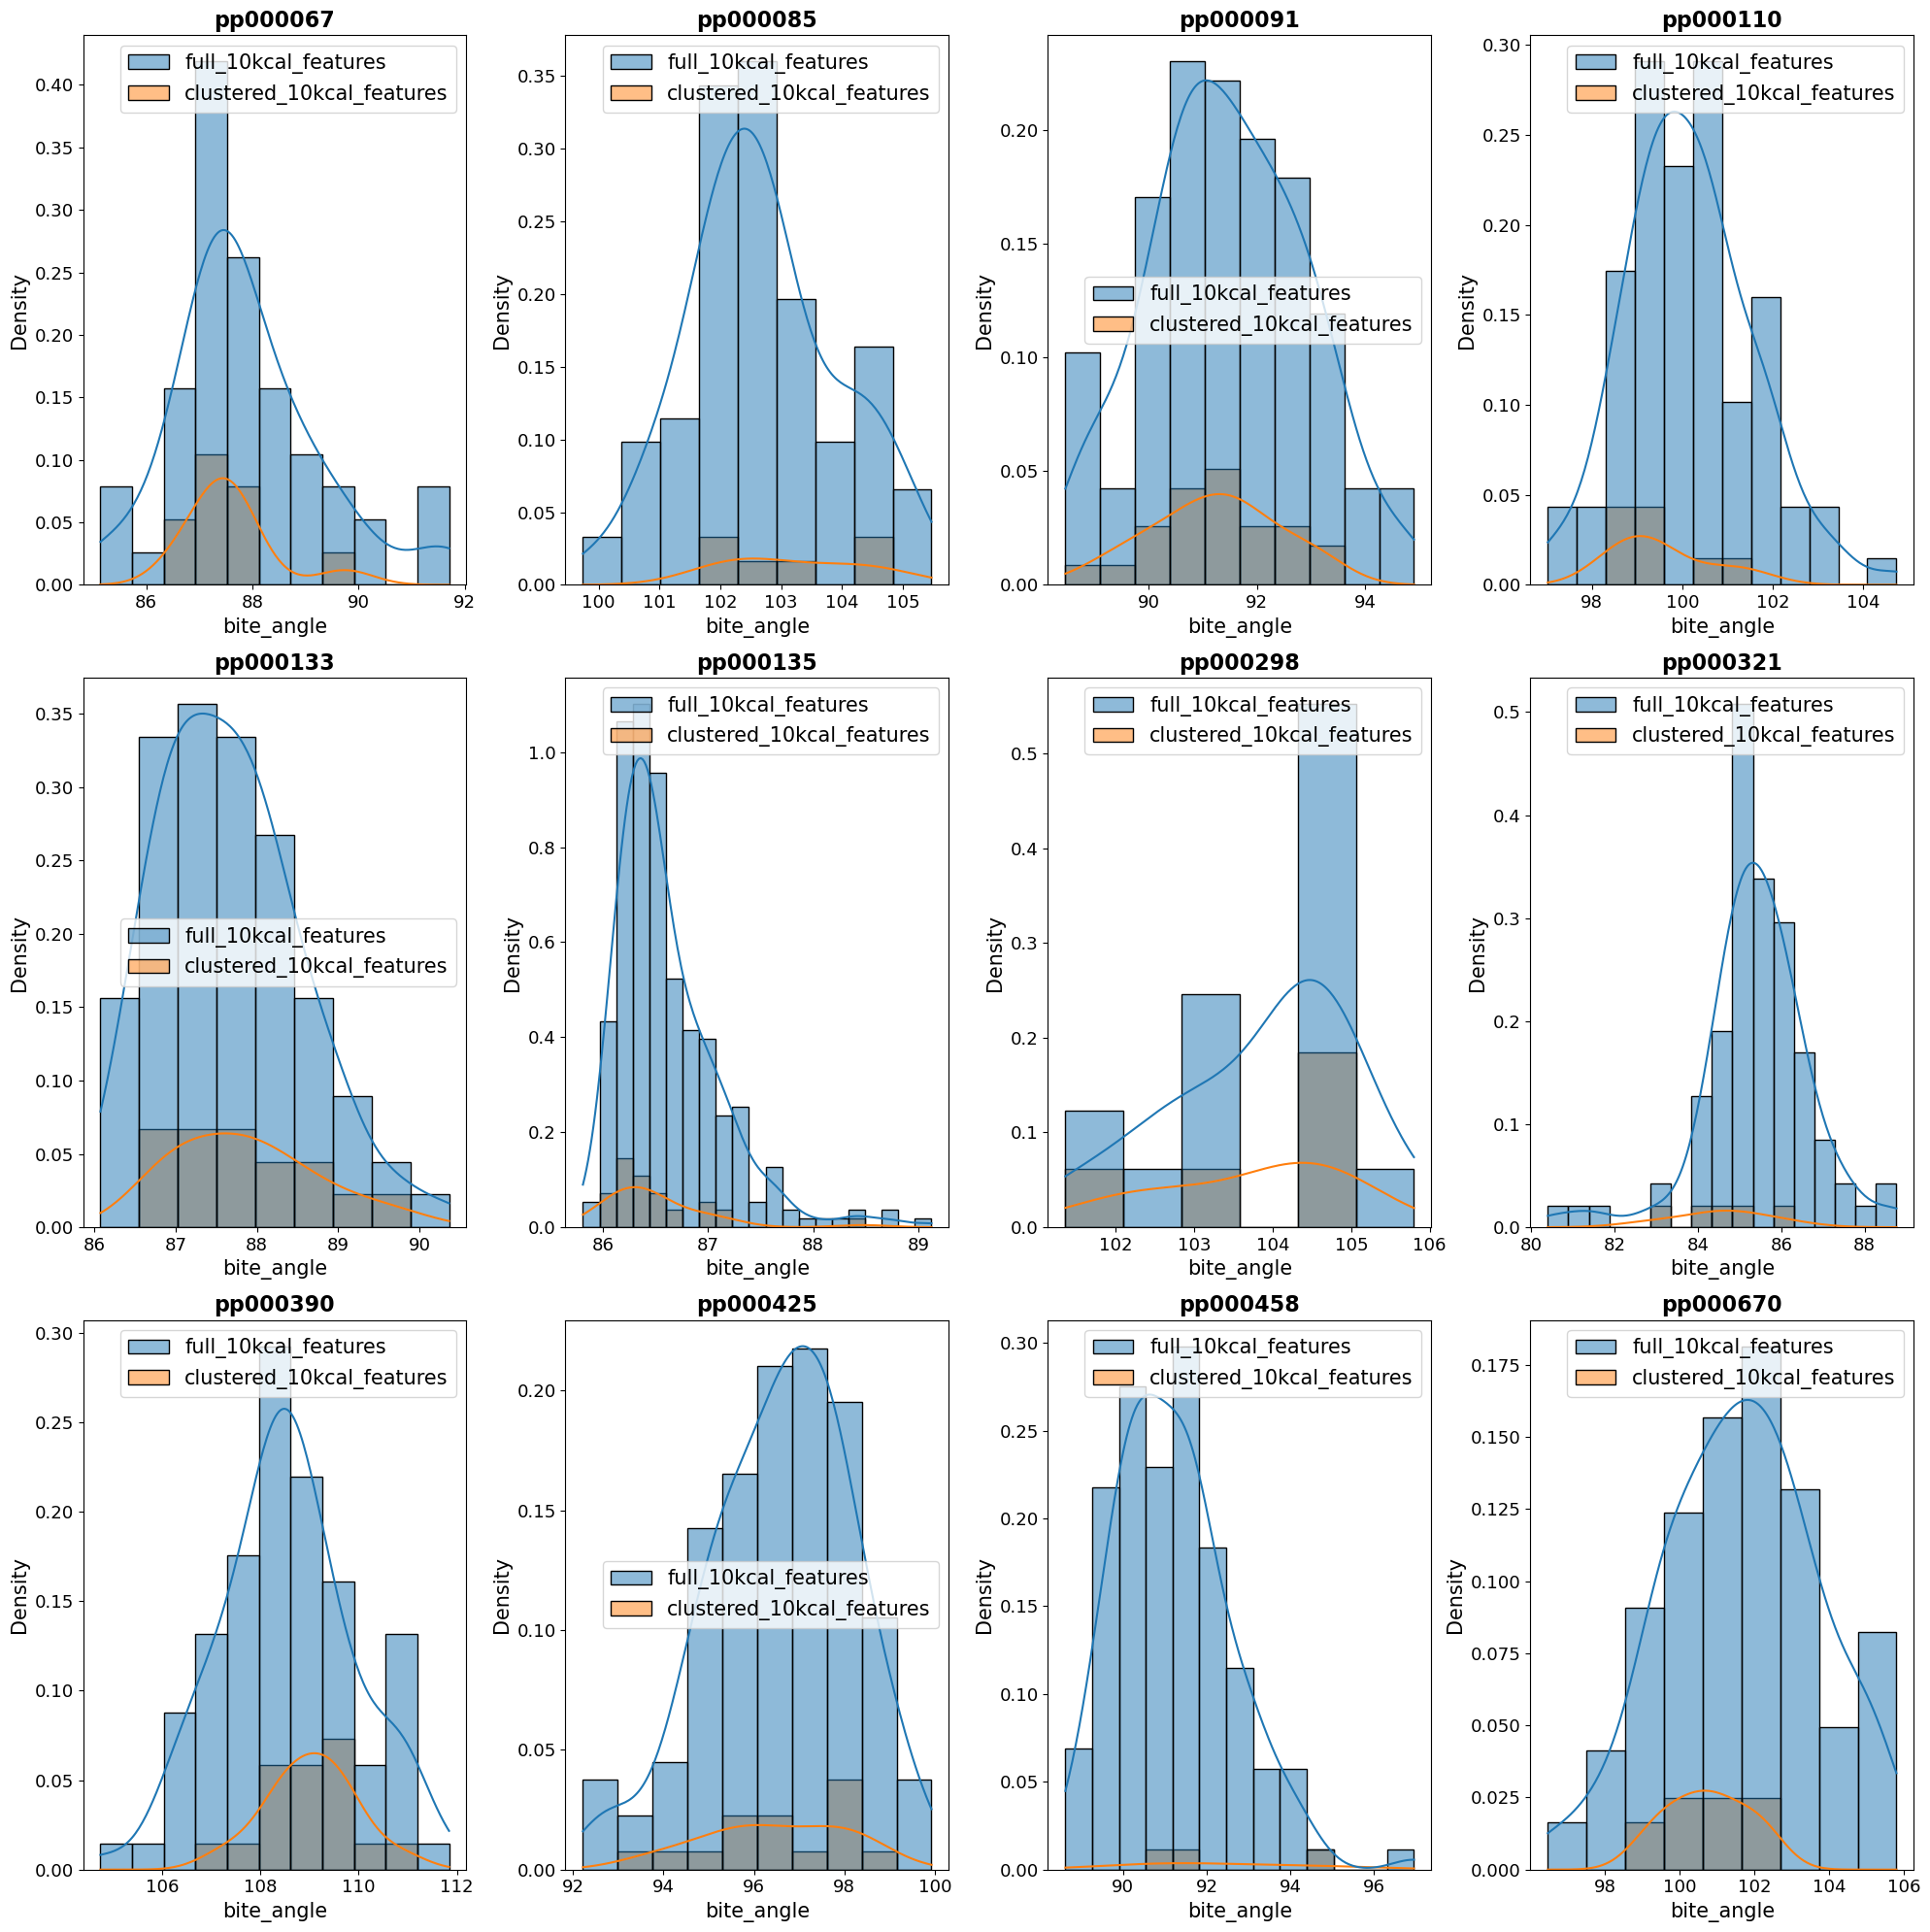

In [8]:
plot_conformers.feature_histograms(ligands, feature = 'bite_angle',  # change feature to plot different features
                                   data1 = full_5kcal_features,  # specify first feature set
                                   data2 = clustered_5kcal_features,  # specify second feature set
                                   label1 = "full_10kcal_features",  # specify label for first feature set
                                   label2 = "clustered_10kcal_features")  # specify label for second feature set